In [ ]:
# Trinidad Marroquin, Jr.
# qsq707

## Lab 2A

<em>Lab 2 consists of two exercises. This is the first of two exercises in Lab 2, which will cover ```numpy```  arrays, linear algebra, ```DataFrame```s, and Seaborn. The code example below shows you how to pull stock data and saving it in a ```DataFrame``` using the Yahoo! finance module.  </em>

### Your Portfolio

Assume you have the following portfolio of stocks including the number of shares (the quantity) of each stock. You will calcukate the value of your portfolio starting January 1st until the day you are working on this asignment based on the closing price of the day.

| Currency    | Symbol | Quantity |
| ------------|--------|--------- |
| Apple       | AAPL   | 20       |
| Microsoft   | MSFT   | 30       |
| Chevron     | CVX    | 40       |
| Ford        | F      | 50       |
| Moderna     | MRNA   | 60       |

You will use the Yahoo Finance module to assist you in the project. 

### About Yahoo Finance Module

The Yahoo Finance Module (```yfinance```) gives you access to real-time and historical stock data. To use the Yahoo finance module, you first need to install it. To install the Yahoo Finance Module, run the following command:

```
pip install yfinance
```

After you have installed the module, you will need to import it into the program. 

```
import yfinance as yf
```

Access the functions through ```yf```. You will only be using the ```download()``` function to get the prices for a given stock during a given time span. Remember that The first line is done for you below.

### Tasks

You will do the following
1. The starter code has been created for you. Specifically, there is an example of how you will access historical stock data from Yahoo Finance module. Adapt and use this sample code to get the required data for the stocks above. The stock symbols are provided above, which is needed for the ```tickers``` parameter.
2. Create a 2D NumPy array which represent the number of shares per stock. Then use the dot product, to find the value of the entire portfolio for each day in January of this year. Create a data frame with the dates and the portfolio values.
3. Create a lineplot using seaborn that plots the prices for each stock for the timeframe from the beginning of this year until the day you are working on the assignment. The x axis are the days (they can just be days numbered 0 through 20). The y axis is the price of the stocks. HINT: use the ```pd.melt()``` function to reconfigure the ```DataFrame``` so you can plot multiple lines using the ```hue``` parameter in the ```lineplot()``` function. After calling ```pd.melt()```, name the value column ```'Price'``` and the variable (column) name ```'Stock'```.
4. Answer the questions below.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import pandas as pd

# This is an example code to download the historic stock price data during March 2020 for AMC and TSLA (Tesla)
# stock. It will collect the data in intervals of one day. You will get a DataFrame of closing 
# prices for each day. The index of row is the TimeStamp for each day. This line also extracts the 
# 'Close' column as we are using that to determine # the price of each stock. 

# The following code has been disabled since it was provided as an example for the lab.
#---------------------------------------------------------------------------------------
# price_data = yf.download( tickers=['AMC','TSLA'], start='2020-03-01', end='2020-03-30', interval='1d' )[ 'Close' ] 
# print( price_data )
#---------------------------------------------------------------------------------------

'''
Step 1.  Access Historical Data from Yahoo Finance
We'll use `yfinance` to pull historical stock data for the given symbols (AAPL, MSFT, CVX, F, MRNA)
starting from March 1, 2020 until March 30, 2020.
'''

portfolio = {
    'AAPL': 20,    # Apple
    'MSFT': 30,    # Microsoft
    'CVX': 40,     # Chevron
    'F': 50,       # Ford
    'MRNA': 60     # Moderna
}

# Set date range (from January 1st to the current day)
start_date = "2024-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')  # Current day

# Download historical stock data (adjusted close prices) for all symbols
symbols = list(portfolio.keys())
price_data = yf.download(symbols, start=start_date, end=end_date)['Close']

# Show the first few rows to confirm the data
print(price_data.head())


[*********************100%***********************]  5 of 5 completed

Ticker                           AAPL         CVX      F        MRNA  \
Date                                                                   
2024-01-02 00:00:00+00:00  185.639999  149.479996  12.16  112.500000   
2024-01-03 00:00:00+00:00  184.250000  152.330002  11.71  108.580002   
2024-01-04 00:00:00+00:00  181.910004  150.660004  11.68  108.660004   
2024-01-05 00:00:00+00:00  181.179993  150.399994  11.85  111.120003   
2024-01-08 00:00:00+00:00  185.559998  149.500000  11.97  115.440002   

Ticker                           MSFT  
Date                                   
2024-01-02 00:00:00+00:00  370.869995  
2024-01-03 00:00:00+00:00  370.600006  
2024-01-04 00:00:00+00:00  367.940002  
2024-01-05 00:00:00+00:00  367.750000  
2024-01-08 00:00:00+00:00  374.690002  


In [14]:
'''
Step 2.  Create a 2D NumPy Array and Calculate Portfolio Value Using Dot Product

Here, we create a 2D NumPy array representing the number of shares and use the dot product to 
calculate the portfolio value for each day from January 1 to current day.

'''

# Create a 2D NumPy array for the quantities of stocks
quantities = np.array([portfolio[symbol] for symbol in symbols]).reshape(1, -1)

# Perform the dot product to calculate the portfolio value for each day
portfolio_values = price_data.dot(quantities.T).values
print(portfolio_values)

# Convert the result into a DataFrame with the date and portfolio value
portfolio_df = pd.DataFrame({
    'Date': price_data.index,
    'Portfolio Value': portfolio_values.flatten()
})

# Display the resulting DataFrame
print(portfolio_df.head())

[[36560.79956055]
 [36388.30051422]
 [36134.6005249 ]
 [36230.599823  ]
 [36928.40023041]
 [36603.8004303 ]
 [36971.19934082]
 [36956.15009308]
 [37200.60001373]
 [36965.89969635]
 [36783.69972229]
 [37052.5       ]
 [37451.60076141]
 [37376.10057831]
 [37651.09928131]
 [37887.89981842]
 [38226.79977417]
 [38104.49939728]
 [38594.19986725]
 [38374.49954987]
 [37486.99901581]
 [37835.69976807]
 [38318.00037384]
 [37900.59944153]
 [38170.19958496]
 [38672.09964752]
 [38430.99937439]
 [38418.89938354]
 [38190.20050049]
 [37373.70063782]
 [37582.59899139]
 [37762.40005493]
 [37439.20009613]
 [37258.10035706]
 [37305.4996109 ]
 [38506.0994339 ]
 [38219.19994354]
 [37888.10031891]
 [37956.20071411]
 [38027.80010223]
 [38103.30059052]
 [38358.4998703 ]
 [38173.20106506]
 [37330.29930115]
 [37357.89966583]
 [37879.90089417]
 [37922.90008545]
 [38369.59949493]
 [38943.99982452]
 [38765.60054779]
 [39300.39993286]
 [38779.00074005]
 [38876.10069275]
 [39252.30014801]
 [39393.70079041]
 [39556.69

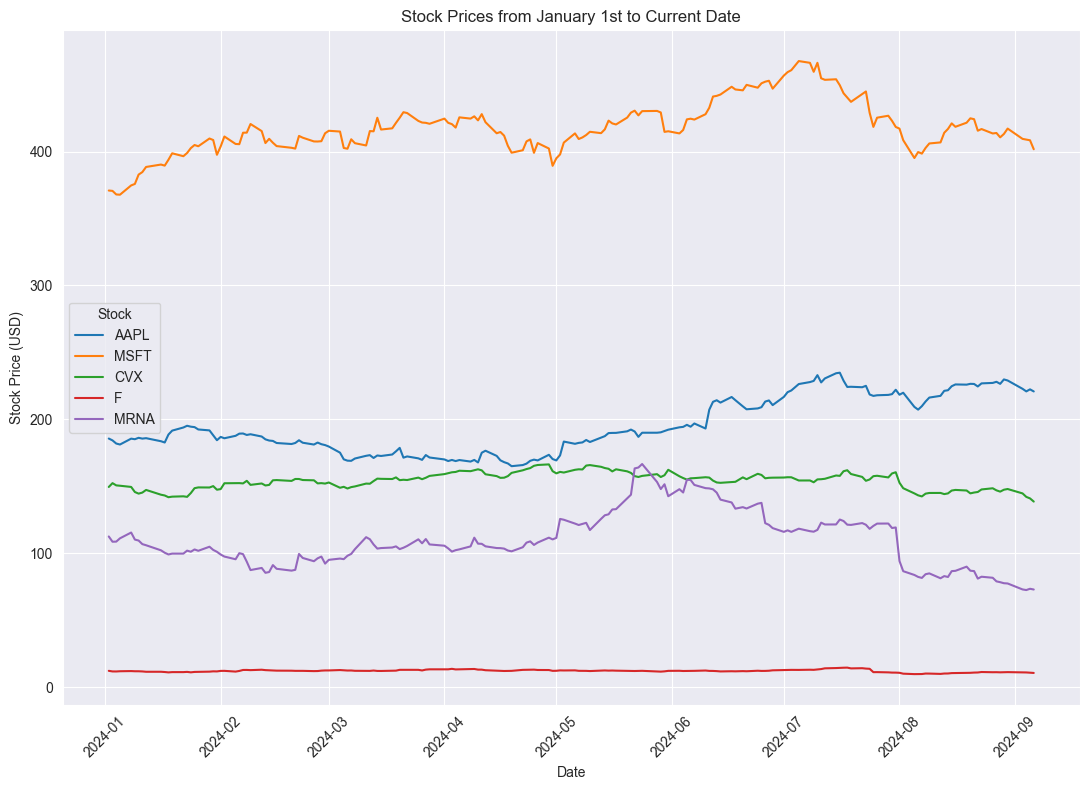

In [15]:
# Step 3: Create a line plot for the stock prices
stock_data_reset = price_data.reset_index()

# Melt the stock data into long format for plotting
melted_data = pd.melt(stock_data_reset, id_vars=['Date'], value_vars=symbols,
                      var_name='Stock', value_name='Price')

# Starter code for your figure
fig = plt.figure( figsize=(11,8) )

# Your code goes here
sns.lineplot(data=melted_data, x='Date', y='Price', hue='Stock')
plt.title("Stock Prices from January 1st to Current Date")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

### Questions

Answer the following questions:

1. Given the quantities of each stock listed above, on which day was your portfolio worth the most money and how much was it worth?

2. Select one of the stocks that had some sizeable movements in prices. Briefly describe what happened with that company that caused those movements. 

In [16]:
# Find the row with the maximum portfolio value, answer for Question 1.
max_row = portfolio_df.loc[portfolio_df['Portfolio Value'].idxmax()]

# Extract the date and the maximum value
max_value_date = max_row['Date']
max_value = max_row['Portfolio Value']

# Output the results
print(f"The portfolio was worth the most on {max_value_date}, and its value was ${max_value:.2f}.")

The portfolio was worth the most on 2024-07-10 00:00:00+00:00, and its value was $43687.30.


In [ ]:
### Write your answers here.

'''
1. The portfolio was worth the most on 2024-07-10, and its value was $43,687.30.

2. Let's focus on **Moderna, INC (MRNA)**.  
   On August 1st, there was a steep decline in price from $120.53 (on July 31) to $99.58, and it continued to slip through the week.  
   (source https://finance.yahoo.com/quote/MRNA/history/)  
   
   An earnings report was published that revealed it was facing high competition in the COVID and RSV vaccine markets, leading to lower product sales forecasts.  
   (source https://www.morningstar.com/stocks/after-earnings-big-selloff-is-moderna-stock-buy)
'''